### **Lab_Network Data**

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
DolEdges = pd.read_csv('/content/dolphin_edges.csv')
DolEdges

In [ ]:
DolVertices = pd.read_csv('/content/dolphin_vertices.csv',index_col='Name', na_values=' ')
DolVertices

## **1.Who are the most popular?**

In [ ]:
DE = nx.from_pandas_edgelist(DolEdges, source='From', target='To', create_using=nx.MultiDiGraph) #ทำเป็นรูปmulti

In [ ]:
DE.edges() #ดูedges

OutMultiEdgeDataView([('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Fish', 'Patchback'), ('Fish', 'SN96'), ('Fish', 'TR77'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('Gallatin', 'Jet'), ('Gallatin', 'Ripplefluke'), ('Gallatin', 'SN90'), ('Gallatin', 'Upbang'), ('Gallatin', 'Web'), ('Grin', 'Hook'), ('Grin', 'MN83'), ('Grin', 'Scabs'), ('Grin', 'Shmuddel'), ('Grin', 'SN4'), ('Grin', 'SN63'), ('Grin', 'SN9'), ('Grin', 'Str

In [ ]:
DE.number_of_edges() #นับedges

159

In [ ]:
print(nx.info(DE)) #print ค่าออกมาดูว่ามีกี่ node, edges

MultiDiGraph with 62 nodes and 159 edges


In [ ]:
DegDE = pd.DataFrame(DE.in_degree,columns=['Node','Degree'])
DegDE #ดูค่าdegree

,Node,Degree
0,CCL,0
1,Double,1
2,DN16,0
3,Feather,2
4,DN21,0
...,...,...
57,TR82,0
58,Whitetip,1
59,Zap,5
60,Zig,1


In [ ]:
DegDE.sort_values('Degree', ascending=False) #เรียงค่า degree

,Node,Degree
49,Trigger,9
56,Web,9
43,Topless,8
35,SN4,7
38,SN9,7
...,...,...
48,Cross,0
12,Beescratch,0
16,DN63,0
34,MN60,0


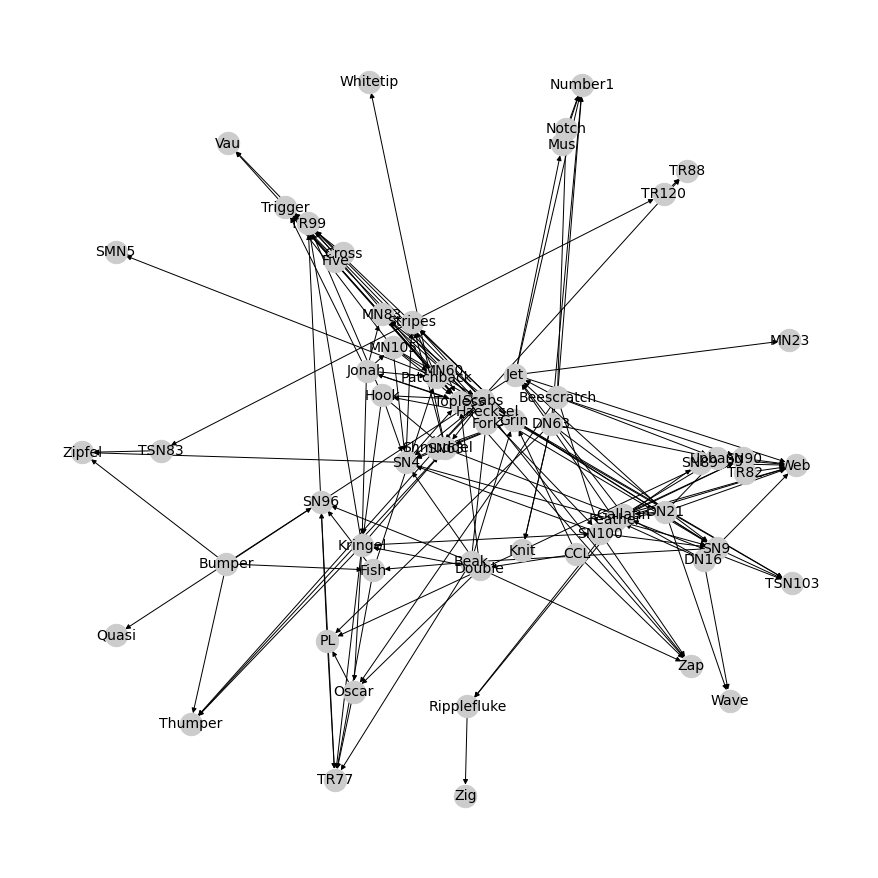

In [ ]:
plt.figure(3,figsize=(12,12)) 
nx.draw(DE,with_labels=True, node_size=500, font_size=14, node_color='#CCCCCC')

## **2.Pick 2 individuals find shortest path**

In [ ]:
Dataweight = DolEdges #สร้างตัวแปรใหม่ให้เท่ากับค่าเดิม

In [ ]:
Dataweight['weight']=1 #เพิ่มอีก Column ชื่อ weight มีค่า = 1

In [ ]:
Dataweight

,From,To,weight
0,CCL,Double,1
1,DN16,Feather,1
2,DN21,Feather,1
3,Beak,Fish,1
4,Bumper,Fish,1
...,...,...,...
154,Topless,Zap,1
155,Ripplefluke,Zig,1
156,Bumper,Zipfel,1
157,SN4,Zipfel,1


In [ ]:
DTweight = nx.from_pandas_edgelist(Dataweight, source='From', target='To', create_using=nx.MultiDiGraph) #ทำเป็น multi

In [ ]:
DTweight

In [ ]:
nx.shortest_path(DTweight,'CCL','SN9',weight='weight') #หา shortest path

['CCL', 'Grin', 'SN9']

In [ ]:
len(nx.shortest_path(DTweight,'CCL','SN9',weight='weight'))

3

## **4.Find components**

In [ ]:
DTedges = nx.from_pandas_edgelist(Dataweight, source='From', target='To') #สร้างตัวแปรเก็บค่าใหม่

In [ ]:
[x for x in nx.connected_components(DTedges)] #ดูcomponents

In [ ]:
len([x for x in nx.connected_components(DTedges)]) #ดูค่าcomponents

1